In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 24.5MB/s]
100% 163M/163M [00:08<00:00, 20.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import numpy as np
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import matplotlib.image as mpimg


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [ ]:
with_mask = os.listdir('/content/data/with_mask')
without_mask =os.listdir('/content/data/without_mask')

In [ ]:
len((with_mask))

3725

In [ ]:
len((without_mask))

3828

In [ ]:
with_mask[0:5]

['with_mask_3685.jpg',
 'with_mask_1734.jpg',
 'with_mask_1155.jpg',
 'with_mask_1832.jpg',
 'with_mask_1748.jpg']

In [ ]:
#Creating labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828


In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


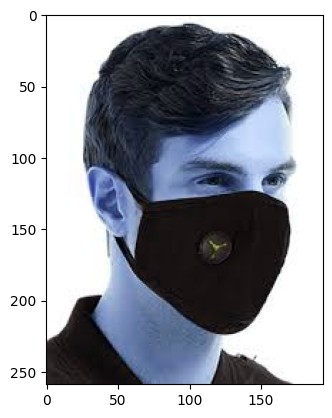

In [ ]:
#displaying with mask image
img1 = cv2.imread('/content/data/with_mask/with_mask_2527.jpg')
plt.imshow(img1)

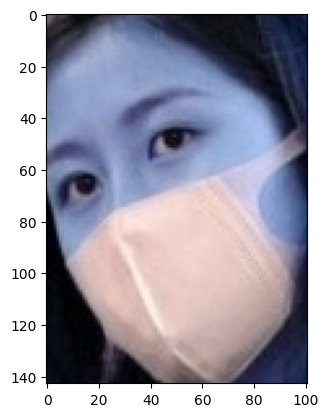

In [ ]:
img2 = cv2.imread('/content/data/with_mask/with_mask_191.jpg')
plt.imshow(img2)

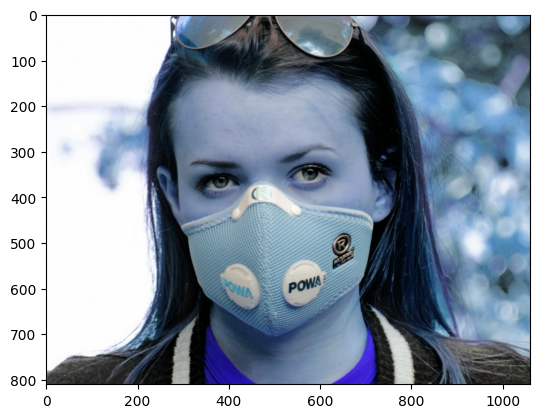

In [ ]:
img3 = cv2.imread('/content/data/with_mask/with_mask_3300.jpg')
plt.imshow(img3)

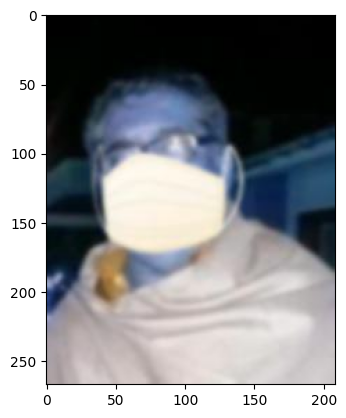

In [ ]:
img4 = cv2.imread('/content/data/with_mask/with_mask_1860.jpg')
plt.imshow(img4)

In [ ]:
without_mask[0:5]

['without_mask_2257.jpg',
 'without_mask_1992.jpg',
 'without_mask_1044.jpg',
 'without_mask_3777.jpg',
 'without_mask_1267.jpg']

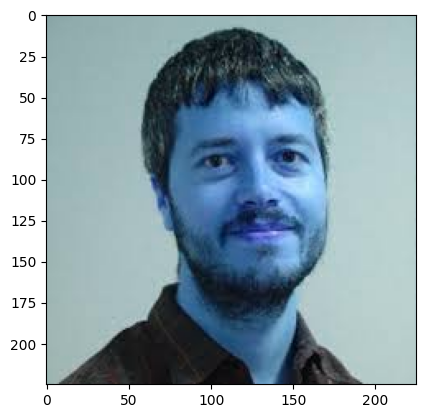

In [ ]:
#displaying without mask image
img5 = cv2.imread('/content/data/without_mask/without_mask_2257.jpg')
plt.imshow(img5)

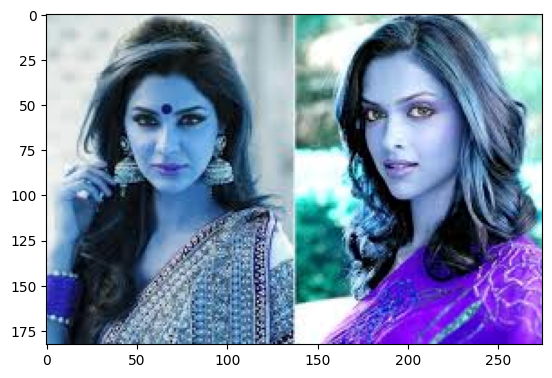

In [ ]:
img6 = cv2.imread('/content/data/without_mask/without_mask_1992.jpg')
plt.imshow(img6)

In [ ]:
with_mask_path = '/content/data/with_mask/'

data =[]

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((120,120))
  image = image.convert('RGB')

  #converting in numpy array

  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((120,120))
  image = image.convert('RGB')

  #converting in numpy array

  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 40,  39,  45],
        [ 37,  36,  42],
        [ 34,  33,  39],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 38,  37,  43],
        [ 38,  37,  43],
        [ 38,  37,  43],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 35,  34,  40],
        [ 38,  37,  43],
        [ 40,  39,  45],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
x.shape

(7553, 120, 120, 3)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#scaling
x_train_scaled =x_train/255
x_test_scaled  =x_test/255

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(164,activation='relu'))

model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled,y_train,epochs=5,validation_split=0.1,verbose =2)

Epoch 1/5
170/170 - 3s - loss: 0.3461 - accuracy: 0.8387 - val_loss: 0.2396 - val_accuracy: 0.9041 - 3s/epoch - 18ms/step
Epoch 2/5
170/170 - 3s - loss: 0.1865 - accuracy: 0.9257 - val_loss: 0.2444 - val_accuracy: 0.9140 - 3s/epoch - 17ms/step
Epoch 3/5
170/170 - 3s - loss: 0.1360 - accuracy: 0.9485 - val_loss: 0.2218 - val_accuracy: 0.9207 - 3s/epoch - 16ms/step
Epoch 4/5
170/170 - 3s - loss: 0.1019 - accuracy: 0.9623 - val_loss: 0.2101 - val_accuracy: 0.9421 - 3s/epoch - 16ms/step
Epoch 5/5
170/170 - 3s - loss: 0.0603 - accuracy: 0.9783 - val_loss: 0.2086 - val_accuracy: 0.9504 - 3s/epoch - 16ms/step


In [ ]:
model.evaluate(x_test_scaled,y_test)

48/48 [==============================] - 0s 8ms/step - loss: 0.1739 - accuracy: 0.9490


[0.1739395260810852, 0.9490403532981873]

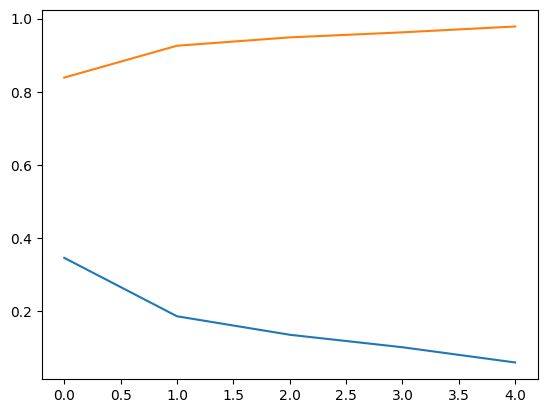

In [ ]:
h=history
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['accuracy'],label='train_accuracy')

In [ ]:
test_img = cv2.imread('/content/Rachit2.jpg.jpteg')


In [ ]:

test_img = cv2.resize(test_img,(120,120))

In [ ]:
test_input1 = test_img.reshape((1,120,120,3))

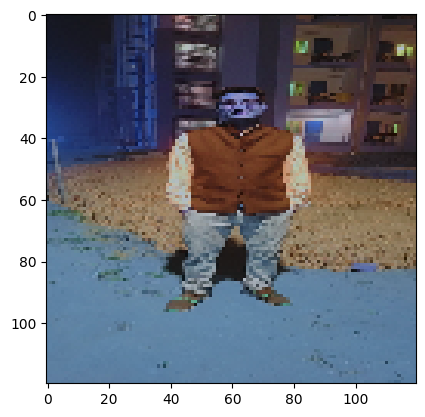

In [ ]:
plt.imshow(test_img)

In [ ]:
prediction = model.predict(test_input1)
pred_label = np.argmax(prediction)
print(pred_label)

1/1 [==============================] - 0s 19ms/step
1


In [ ]:
test_img = cv2.imread('/content/face.jfif')

In [ ]:
test_img = cv2.resize(test_img,(120,120))

In [ ]:
test_input = test_img.reshape((1,120,120,3))

In [ ]:
prediction = model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


In [ ]:
pred_label = np.argmax(prediction)
print(pred_label)

1
